# **P4DS Final Project: An Analysis On Global Warming**
Huy G. Tong $^{1 *}$ \
$^{1}$ *Faculty of Information Technology, VNUHCM - University of Science, Vietnam*\
$^{*}$ *Student ID: 21127307*


#### **ABSTRACT**
This research analyses the publicly available records of global temperature to observe its change throughout history. This analysis can also help debunk the false claim of *global warming being a hoax*. Additionally, the contribution of carbon dioxide gas in raising the Earth's surface temperature is also put into consideration. This `Notebook` presents the steps taken to process and visualize the data through a series of plots.

#### **1. INTRODUCTION**
The purpose of this study is to answer 2 main questions:

- *How has the globe's temperature changed throughout the years?* 
- *Are there any relation between global warming and the emission of greenhouse gas?*

Throughout this `Notebook`, I will describe the key ideas for processing and analysis of the data. I will also include my implementation of `Python` code to help with my analysis

#### **2. METHOD**

In this section, I will describe in detail the steps used to perform the analysis on the dataset. I will also give a brief description of the data used in this project, as well as include the codes to help derive insightful information.

First, let us import the necessary packages, be sure to run the bellow cell at least once when executing this Notebook.


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import datetime as dt

#### **2.1 Data**

I use [**Kaggle**](https://www.kaggle.com/) as the main source for finding usable datasets. The main dataset used in this research is the [**Climate Change: Earth Surface Temperature Data**](https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data) dataset, made available publicly by *Berkeley Earth*. The files included in this dataset are `GlobalTemperatures.csv` and `GlobalLandTemperaturesByCountry.csv`.

I also make use of the [**CO2 Emissions**](https://www.kaggle.com/datasets/ulrikthygepedersen/co2-emissions-by-country/data) published by *Ulrik Thyge Pedersen* for additional analysis of the $CO_{2}$-Temp relation. This dataset include 1 single file `co2_emissions_kt_by_country.csv`.

All data provided are licensed under Creative Commons 4.0, however the data provided by *Berkeley Earth* do not allow for commercial use.

In [2]:
globtemp = pd.read_csv("data/GlobalTemperatures.csv")
country_surftemp = pd.read_csv("data/GlobalLandTemperaturesByCountry.csv")
country_co2_emission = pd.read_csv("data/co2_emissions_kt_by_country.csv")

#### **2.2 Preprocessing**

In [3]:
# globtemp = globtemp.dropna(axis=0)
# country_surftemp = country_surftemp.dropna(axis=0)
# country_co2_emission = country_co2_emission.dropna(axis=0)

In [4]:
globtemp_annual = globtemp.copy()
globtemp_annual["dt"] = pd.to_datetime(globtemp_annual["dt"], format="%Y-%m-%d").dt.year
globtemp_annual = globtemp_annual[["dt", "LandAverageTemperature", "LandAverageTemperatureUncertainty"]]
globtemp_annual = globtemp_annual.groupby("dt").mean().reset_index()
globtemp_annual.sample(3)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty
165,1915,8.593167,0.246167
83,1833,8.013000,1.233500
1,1751,7.976143,2.781143


In [5]:
country_surftemp["dt"] = pd.to_datetime(country_surftemp["dt"], format="%Y-%m-%d")
globtemp_annual.sample(3)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty
152,1902,8.304417,0.292750
185,1935,8.515750,0.235917
80,1830,8.516750,1.431417


In [6]:
country_co2_emission["year"] = pd.to_datetime(country_co2_emission["year"], format="%Y").dt.year
co2_emission_annual = country_co2_emission[["year", "value"]]
co2_emission_annual = co2_emission_annual.groupby("year").mean().reset_index()
co2_emission_annual.sample(3)

,year,value
11,1971,6.063446e+05
55,2015,1.206571e+06
6,1966,4.587570e+05


#### **2.3 Analysis**

note questions:
- how has the global temperature changed throughout the years?
- temp and gas: what is the relation?

#### **2.3.1 Global surface temperature trend**

The surface temperature of the globe is visualized with the code cell bellow

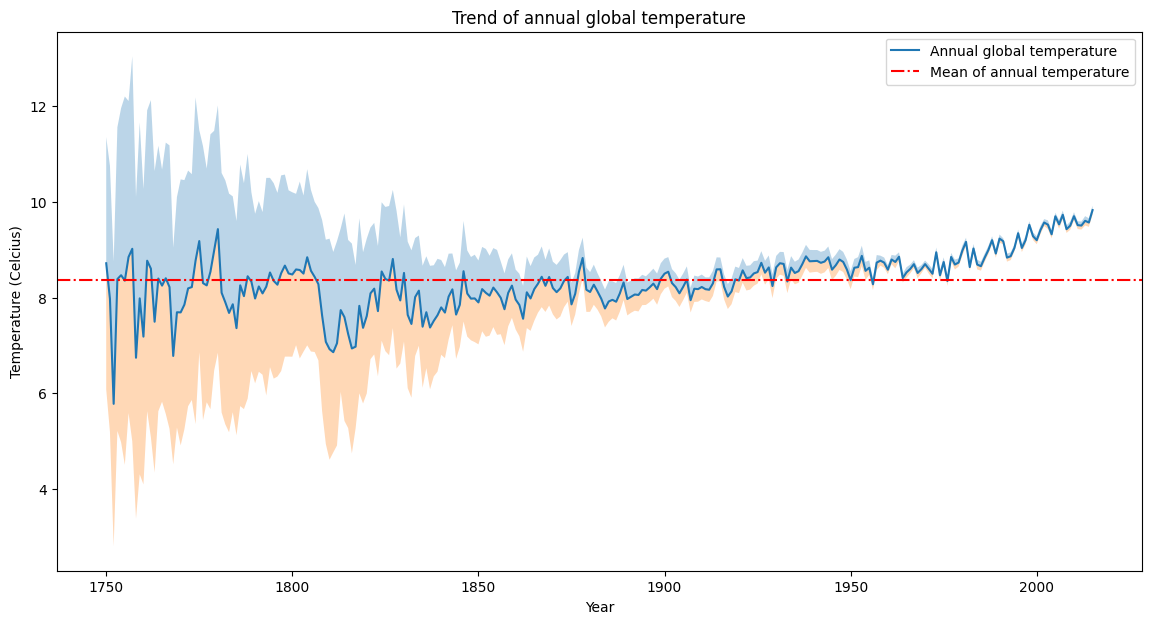

In [7]:
# Plot the annual temperature

years = globtemp_annual["dt"]

annual_avg = globtemp_annual["LandAverageTemperature"]
annual_uncertainty = globtemp_annual["LandAverageTemperatureUncertainty"]

plt.plot(years, annual_avg, label="Annual global temperature")
plt.fill_between(years, annual_avg, annual_avg + annual_uncertainty, alpha=0.3)
plt.fill_between(years, annual_avg, annual_avg - annual_uncertainty, alpha=0.3)

plt.axhline(annual_avg.mean(), color="red", linestyle="-.", label="Mean of annual temperature")

plt.xlabel("Year")
plt.ylabel("Temperature (Celcius)")
plt.title("Trend of annual global temperature")
plt.legend()

fig = plt.gcf()
fig.set_size_inches((14, 7))

plt.show()

From the time series plot, it is very easy to notice that the global temperature has risen in the recent years. Past recorded temperatures (from the 1700s to the 1980s), remained stable throughout the years. However as the end of the 20th century approached, the Earth observed a drastic change in temperature.

To observe the change in temperature more clearly, I select a sample of countries to see how their temperature changed throughout a century. First, I filter out the data within a period of time, in this case, all the national temperature measured from the year 1900 to 2013 will be analyzed. It is necessary to keep in mind that the nation-wise data is only available up to 2013.

To filter the rows, I apply a boolean mask to the entire data frame, as shown in the cell below.

In [8]:
year_min, year_max = 1900, 2013

country_surftemp = country_surftemp.loc[
    (country_surftemp["dt"].dt.year >= year_min)
    & (country_surftemp["dt"].dt.year <= year_max)
]

Next, I choose a few countries to examine. The sample countries should be within the same geographical region, as different regions will have different climate, thus the temperature range will be different.

There are 4 countries in my sample, all are located in the northern hemisphere, close to the polar region, thus having colder climate than the tropics. Since the original dataset provided nation-wise monthly temperature, further processing must be made to calculate the annual temperature of each nation. 

The code cell bellow will loop through each target country, calculate the annual temperature then plot it as a time series.

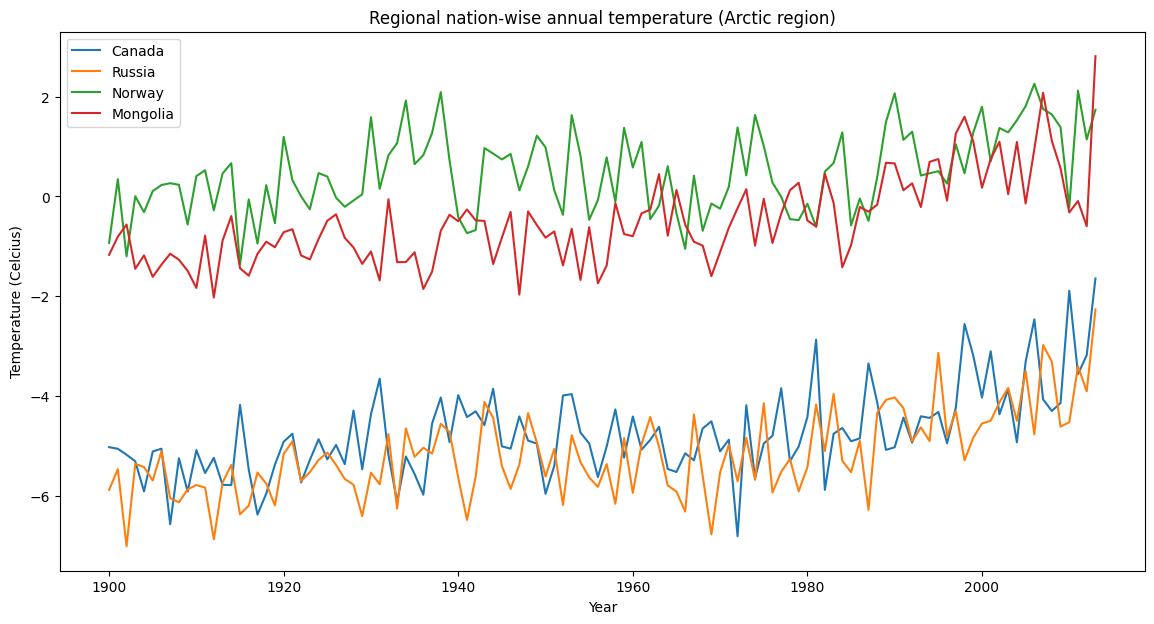

In [9]:
countries = ["Canada", "Russia", "Norway", "Mongolia"]

for country in countries:

    # Extract the rows of 1 country and retain the year and average temp
    nation_annual_temp = country_surftemp.loc[country_surftemp["Country"] == country]
    nation_annual_temp = nation_annual_temp[["dt", "AverageTemperature"]]

    nation_annual_temp["dt"] = nation_annual_temp["dt"].dt.year
    nation_annual_temp = nation_annual_temp.groupby("dt").mean().reset_index()

    plt.plot(
        nation_annual_temp["dt"], nation_annual_temp["AverageTemperature"],
        label=f"{country}"
    )

plt.xlabel("Year")
plt.ylabel("Temperature (Celcius)")
plt.title("Regional nation-wise annual temperature (Arctic region)")
plt.legend()

fig = plt.gcf()
fig.set_size_inches(((14, 7)))

plt.show()

The sampled countries' temperature also showed signs of rising. Tho the change is visible throughout all samples, the data from Canada and Russia are more notable.

By examining the global and national trend, we can conclude that the Earth is going through **global warming**. Acknowledging this fact is an important step to work towards a solution for this matter.

#### **2.3.2. Global warming: relation with greenhouse gas**

Extensive researches have been conducted to pinpoint the cause of global warming, with greenhouse gases such as carbon dioxide ($CO_{2}$) becoming widely accepted as one of the leading causes.

To observe this relation, I use the `co2_emission_annual` along with the `globtemp_annual` dataset.

Since the datasets are recorded independently, the surveyed periods could be different. Therefore, I had to match the start and end years of each sets before plotting.

To perform this step of preprocessing, first I took the 2 timestamp endpoints of each dataset. Then by taking the `max` of the 2 initial timestamps and the `min` of the 2 ending years, I obtained the 2 endpoints of a period in which both datasets have valid values.

In [10]:
globtemp_year_min = globtemp_annual["dt"].min()
globtemp_year_max = globtemp_annual["dt"].max()

co2_emission_year_min = co2_emission_annual["year"].min()
co2_emission_year_max = co2_emission_annual["year"].max()

start_year = max(globtemp_year_min, co2_emission_year_min)
end_year = min(globtemp_year_max, co2_emission_year_max)

globtemp_matched = globtemp_annual.loc[
    (globtemp_annual["dt"] >= start_year) 
    & (globtemp_annual["dt"] <= end_year)
]

co2_emission_matched = co2_emission_annual.loc[
    (co2_emission_annual["year"] >= start_year) 
    & (co2_emission_annual["year"] <= end_year)
]

print(f"-- Matched data from year {start_year} to {end_year}")
print(f"-- Total of {end_year - start_year + 1} years")

-- Matched data from year 1960 to 2015
-- Total of 56 years


After preprocessing, the data is ready to be drawn on a plot. Since the temperature and $CO_{2}$ emission measurements have different unit, I make use of the dual-axis plot to draw the final figure.

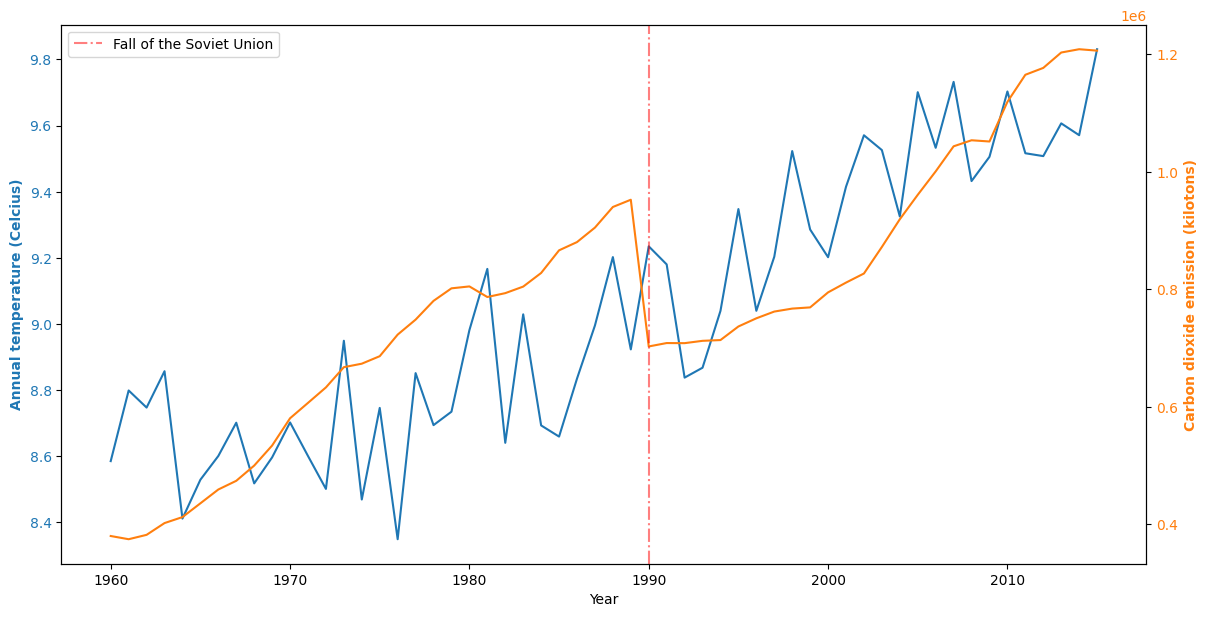

In [11]:
matched_years = np.arange(start_year, end_year + 1)

fig, ax_temp = plt.subplots()

ax_temp.plot(matched_years, globtemp_matched["LandAverageTemperature"], color="tab:blue")
ax_temp.set_xlabel("Year")
ax_temp.set_ylabel("Annual temperature (Celcius)", color="tab:blue", fontweight="bold")
ax_temp.tick_params(axis='y', labelcolor="tab:blue")

ax_co2 = ax_temp.twinx()
ax_co2.plot(matched_years, co2_emission_matched["value"], color="tab:orange")
ax_co2.set_ylabel("Carbon dioxide emission (kilotons)", color="tab:orange", fontweight="bold")
ax_co2.tick_params(axis='y', labelcolor="tab:orange")

plt.axvline(1990, color="red", alpha=0.5, linestyle="-.", label="Fall of the Soviet Union")

plt.legend()

fig = plt.gcf()
fig.set_size_inches((14, 7))

plt.show()

Upon initial inspection, we can see the 2 variables (temperature and $CO_{2}$ emission) correlates well since they follow roughly the same trend. This indicates a relation between the amount of greenhouse gas in the atmosphere with the recorded surface temperature.

There is 1 the anomaly in the greenhouse gas emission data, which is visible in the year 1990, when the emissions suddenly dropped. However, the annual temperature kept on rising, this is because carbon dioxide is not the only contributing factor to global warming. 

#### **3. CONCLUSION**

#### **REFERENCES**